## First Week Project: Create an animated scatterplot  

### Import the libraries 

In [104]:
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib import patches as mpatches
import seaborn as sns
import imageio

### Load the Data

In [2]:
fert = pd.read_csv("../Data/gapminder_total_fertility.csv")
life = pd.read_excel("../Data/gapminder_lifeexpectancy.xlsx")

### Get some information about the dataframes

In [3]:
fert.shape

(260, 217)

In [4]:
life.shape

(260, 218)

In [5]:
fert.head(3)

,Total fertility rate,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
life.head(3)

,Life expectancy,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fert.columns

Index(['Total fertility rate', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)

In [8]:
fert.index

RangeIndex(start=0, stop=260, step=1)

In [9]:
life.columns

Index(['Life expectancy',            1800.0,            1801.0,
                  1802.0,            1803.0,            1804.0,
                  1805.0,            1806.0,            1807.0,
                  1808.0,
       ...
                  2007.0,            2008.0,            2009.0,
                  2010.0,            2011.0,            2012.0,
                  2013.0,            2014.0,            2015.0,
                  2016.0],
      dtype='object', length=218)

In [10]:
life.index

RangeIndex(start=0, stop=260, step=1)

### Clean the data

In [11]:
#Let's set the index of both dataframes to the "Total Fertility Rate" (resp. "Life Expectancy") Column
fert.set_index("Total fertility rate",inplace=True)
fert.head(1)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
life.set_index("Life expectancy",inplace=True)
life.head(1)

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Note that the fert columns are strings, we have to convert them to integers
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [14]:
fert.columns = fert.columns.astype(int)
fert.columns
#We don't have to convert the life columns (they are in the right format)

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [15]:
#Let's rename the index after we set him (for both dfs)
fert.index.name="Country"
life.index.name="Country"
fert.head(1)


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
life.head(1)

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
life.columns

Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0, 1808.0,
       1809.0,
       ...
       2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
       2016.0],
      dtype='object', length=217)

#### Converting into long format

In [18]:
#Moving the index row one to the right 
fert = fert.reset_index()
life = life.reset_index()

In [19]:
fert.head(1)

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
life.head(1)

,Country,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we melt the dataframes

In [21]:
fert_long = fert.melt(id_vars="Country", var_name="Year", value_name="Fertility_Rate")

In [22]:
fert_long

,Country,Year,Fertility_Rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [23]:
life_long = life.melt(id_vars="Country", var_name="Year", value_name="Life Expectancy")

In [24]:
life_long

,Country,Year,Life Expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82
...,...,...,...
56415,Yugoslavia,2016.0,NaN
56416,Zambia,2016.0,57.10
56417,Zimbabwe,2016.0,61.69
56418,Åland,2016.0,NaN


##### The same thing with the "gapminder_population.xlsx"

In [25]:
pop = pd.read_excel("../Data/gapminder_population.xlsx", nrows=260) #The original file has 275 rows, which we dont want, I guess?

In [26]:
pop.shape

(260, 82)

In [27]:
pop.columns #Thankfully, it's in the right format

Index(['Total population',             1800.0,             1810.0,
                   1820.0,             1830.0,             1840.0,
                   1850.0,             1860.0,             1870.0,
                   1880.0,             1890.0,             1900.0,
                   1910.0,             1920.0,             1930.0,
                   1940.0,             1950.0,             1951.0,
                   1952.0,             1953.0,             1954.0,
                   1955.0,             1956.0,             1957.0,
                   1958.0,             1959.0,             1960.0,
                   1961.0,             1962.0,             1963.0,
                   1964.0,             1965.0,             1966.0,
                   1967.0,             1968.0,             1969.0,
                   1970.0,             1971.0,             1972.0,
                   1973.0,             1974.0,             1975.0,
                   1976.0,             1977.0,             197

In [28]:
pop.index

RangeIndex(start=0, stop=260, step=1)

In [29]:
pop.head(1)

,Total population,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pop.set_index("Total population", inplace=True)

In [31]:
pop.head(1)

,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,1890.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
pop.index.name = "Country"
pop = pop.reset_index()

In [33]:
pop_long = pop.melt(id_vars="Country", var_name="Year",value_name="Population")

In [34]:
pop_long

,Country,Year,Population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,410445.0
4,Algeria,1800.0,2503218.0
...,...,...,...
21055,Yugoslavia,2015.0,NaN
21056,Zambia,2015.0,16211767.0
21057,Zimbabwe,2015.0,15602751.0
21058,Åland,2015.0,NaN


### Gluing the Dataframes together

In [35]:
life_long.head()

,Country,Year,Life Expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82


In [36]:
life_long.shape

(56420, 3)

In [37]:
fert_long.head()

,Country,Year,Fertility_Rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99


In [38]:
fert_long.shape

(56160, 3)

In [39]:
pop_long.head()

,Country,Year,Population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,410445.0
4,Algeria,1800.0,2503218.0


In [40]:
pop_long.shape

(21060, 3)

In [41]:
pop_long.head()

,Country,Year,Population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3280000.0
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,410445.0
4,Algeria,1800.0,2503218.0


In [42]:
df_merged = fert_long.merge(pop_long,how="inner")

In [43]:
df_data = df_merged.merge(life_long,how="inner")

In [44]:
df_data

,Country,Year,Fertility_Rate,Population,Life Expectancy
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40
4,Algeria,1800,6.99,2503218.0,28.82
...,...,...,...,...,...
20974,Yugoslavia,2015,NaN,NaN,NaN
20975,Zambia,2015,5.59,16211767.0,56.70
20976,Zimbabwe,2015,3.35,15602751.0,59.30
20977,Åland,2015,NaN,NaN,NaN


In [45]:
#Create new column for the corresponding continents and clean the data 
df_continents = pd.read_csv("../Data/continents.csv",sep=";")
df_continents.head(1)

,continent,country
0,Africa,Algeria


In [46]:
dict_cont = dict(zip(df_continents.country, df_continents.continent))

In [47]:
list_countries_data = df_data.Country.to_list()

In [48]:
lst=[]
for country in list_countries_data: 
    if country in dict_cont:
        lst.append(dict_cont[country])
    else:
        lst.append("NaN")

In [49]:
df_data["Continent"]=lst

In [60]:
df_data.head()

,Country,Year,Fertility_Rate,Population,Life Expectancy,Continent
0,Abkhazia,1800,NaN,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21,Asia
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40,Europe
4,Algeria,1800,6.99,2503218.0,28.82,Africa


In [69]:
#Delete Countries with Nan in Continent from the data)
bool_filter = ~(df_data["Continent"]=="NaN")
df_data = df_data[bool_filter]

### Selecting columns and plotting them - The first step

<AxesSubplot:xlabel='Life Expectancy', ylabel='Fertility_Rate'>

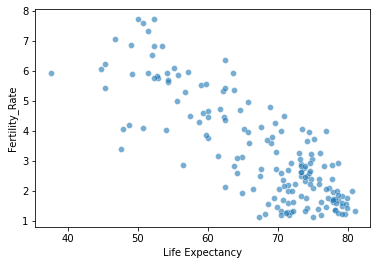

In [70]:
df_subset = df_data.loc[df_data["Year"]==2000]
sns.scatterplot(x="Life Expectancy",y="Fertility_Rate",data=df_subset,alpha=0.6)

### Create scatterplots for each year between 1960 and 2015 

In [140]:
scale=75_000# To adjust the size (see s=df_year["Population"])
cont_labels = df_data["Continent"].unique()
rgb_val = sns.color_palette("Set2",6)
color_map = dict(zip(cont_labels,rgb_val))

#Manually creating the Legend 
asia_patch = mpatches.Patch(color=color_map["Asia"], label='Asia')
europe_patch = mpatches.Patch(color=color_map["Europe"],label='Europe')
africa_patch = mpatches.Patch(color=color_map["Africa"],label='Africa')
na_patch = mpatches.Patch(color=color_map["North America"], label='North America')
sa_patch = mpatches.Patch(color=color_map["South America"], label='South America')
aus_patch = mpatches.Patch(color=color_map["Australia and Oceania"], label='Australia and Oceania')

#Countries to highlight 
countrylist=["Germany","China"]

for year in range(1960,2016):
    df_year = df_data.loc[df_data["Year"]==year]
    plt.figure(figsize=(15,8))
    plt.style.use("ggplot")
    
    plt.scatter(x=df_year["Life Expectancy"],y=df_year["Fertility_Rate"],s=df_year["Population"]/scale,alpha=0.6, c=df_year["Continent"].map(color_map))
    
    for country in countrylist:
        x_cor = float(df_year.loc[df_year["Country"]==country,['Life Expectancy']].values[0])
        y_cor = float(df_year.loc[df_year["Country"]==country,['Fertility_Rate']].values[0])
        plt.text(s=country,y=y_cor,x=x_cor,fontsize=12,weight="bold")
        
    plt.xlabel("Life Expectancy",fontsize=20)
    plt.ylabel("Fertility Rate",fontsize=20)
    plt.axis((0,90,0,10))
    
    plt.title(f"The Year is: {year}",fontsize=30)
    plt.legend(handles=[asia_patch,europe_patch,africa_patch,na_patch,sa_patch,aus_patch],bbox_to_anchor=(1.0, 1.0), loc=1, frameon = False)
    
    plt.savefig(f"Figures/{year}_figure.png")
    plt.close()
    
    



### Create the actual gif animation

In [141]:
images=[]
for year in range(1960, 2016):
    filename = f"Figures/{year}_figure.png"
    images.append(imageio.imread(filename))

imageio.mimsave('animated_scatterplot.gif', images, fps=20)


/tmp/ipykernel_6883/3411549587.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
